In [2]:
%matplotlib inline

import pathlib
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.interpolate import interp1d
from scipy.integrate import simpson
from scipy.optimize import curve_fit, minimize, NonlinearConstraint
from scipy.constants import c, e, h

q = e

Jsc (mA/cm2) 2J cell 1 Wavelabs: 16.944
Jsc (mA/cm2) 2J cell 2 Wavelabs: 15.432
Jsc (mA/cm2) 2J cell 1 am15g: 16.374
Jsc (mA/cm2) 2J cell 2 am15g: 15.527
Jsc (mA/cm2) 3J cell 1 Wavelabs: 12.097
Jsc (mA/cm2) 3J cell 2 Wavelabs: 9.074
Jsc (mA/cm2) 3J cell 3 Wavelabs: 10.122
Jsc (mA/cm2) 3J cell 1 am15g: 11.422
Jsc (mA/cm2) 3J cell 2 am15g: 9.097
Jsc (mA/cm2) 3J cell 3 am15g: 10.306
M 2J: 0.994
M 3J: 0.997


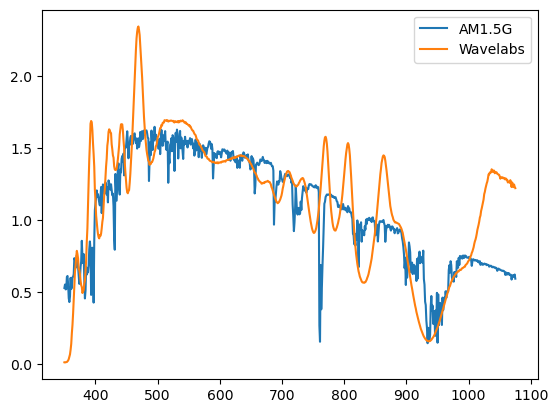

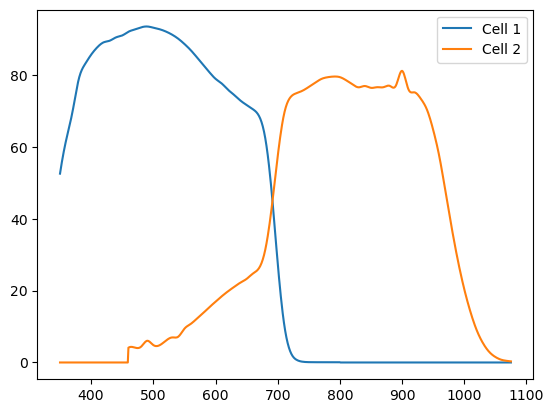

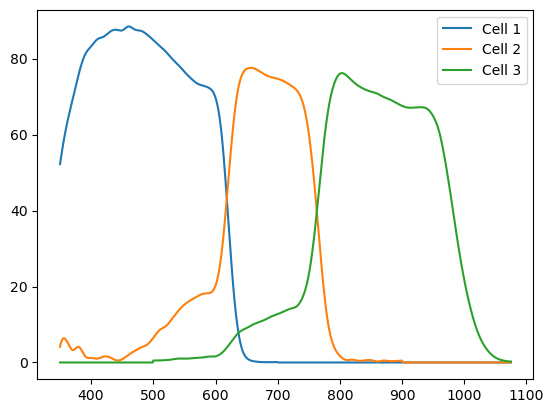

In [11]:
# define folders
cwd = pathlib.Path.cwd()

# get illumination spectra
am15g = np.genfromtxt(r"spectrum/AM1.5G.txt", delimiter="\t", skip_header=1)
wavelabs = np.genfromtxt(r"spectrum/2024-07-10_wavelabs_spectrum_abs.txt", delimiter="\t", skip_header=1)

# get eqe's                        
twoj_1 = np.genfromtxt(r"2J_cell1.txt", delimiter="\t", skip_header=1)
twoj_2 = np.genfromtxt(r"2J_cell2.txt", delimiter="\t", skip_header=1)
thrj_1 = np.genfromtxt(r"3J_cell1.txt", delimiter="\t", skip_header=1)
thrj_2 = np.genfromtxt(r"3J_cell2.txt", delimiter="\t", skip_header=1)
thrj_3 = np.genfromtxt(r"3J_cell3.txt", delimiter="\t", skip_header=1)

# interpolate data
f_am15g = sp.interpolate.interp1d(am15g[:,0], am15g[:,1], kind="cubic", bounds_error=False, fill_value=0)
f_twoj_1 = sp.interpolate.interp1d(twoj_1[:,0], twoj_1[:,1], kind="cubic", bounds_error=False, fill_value=0)
f_twoj_2 = sp.interpolate.interp1d(twoj_2[:,0], twoj_2[:,1], kind="cubic", bounds_error=False, fill_value=0)
f_thrj_1 = sp.interpolate.interp1d(thrj_1[:,0], thrj_1[:,1], kind="cubic", bounds_error=False, fill_value=0)
f_thrj_2 = sp.interpolate.interp1d(thrj_2[:,0], thrj_2[:,1], kind="cubic", bounds_error=False, fill_value=0)
f_thrj_3 = sp.interpolate.interp1d(thrj_3[:,0], thrj_3[:,1], kind="cubic", bounds_error=False, fill_value=0)

wls = wavelabs[:,0] # use wavelabs spectrum for wavelengths
am15g_i = f_am15g(wls)
twoj_1_i = f_twoj_1(wls)
twoj_2_i = f_twoj_2(wls)
thrj_1_i = f_thrj_1(wls)
thrj_2_i = f_thrj_2(wls)
thrj_3_i = f_thrj_3(wls)

# fig, ax = plt.subplots()
# ax.plot(wls, am15g_i, label="AM1.5G")
# ax.plot(wls, wavelabs[:,1], label="Wavelabs")
# ax.legend(loc="best")

# fig, ax = plt.subplots()
# ax.plot(wls, twoj_1_i, label="Cell 1")
# ax.plot(wls, twoj_2_i, label="Cell 2")
# ax.legend(loc="best")

# fig, ax = plt.subplots()
# ax.plot(wls, thrj_1_i, label="Cell 1")
# ax.plot(wls, thrj_2_i, label="Cell 2")
# ax.plot(wls, thrj_3_i, label="Cell 3")
# ax.legend(loc="best")

# get energies from wavelengths
es = h * c / (wls * 1e-9)

# calculate jsc (ma/cm2) for each junction under each light source, given eqe's (convert % to 0-1)
jsc_twoj_1_wavelabs = q * sp.integrate.simpson(y=(twoj_1_i / 100) * wavelabs[:,1] / es, x=wls) * (1000/ 10000)
jsc_twoj_2_wavelabs = q * sp.integrate.simpson(y=(twoj_2_i / 100) * wavelabs[:,1] / es, x=wls) * (1000/ 10000)
jsc_twoj_1_am15g = q * sp.integrate.simpson(y=(twoj_1_i / 100) * am15g_i / es, x=wls) * (1000/ 10000)
jsc_twoj_2_am15g = q * sp.integrate.simpson(y=(twoj_2_i / 100) * am15g_i / es, x=wls) * (1000/ 10000)

jsc_thrj_1_wavelabs = q * sp.integrate.simpson(y=(thrj_1_i / 100) * wavelabs[:,1] / es, x=wls) * (1000/ 10000)
jsc_thrj_2_wavelabs = q * sp.integrate.simpson(y=(thrj_2_i / 100) * wavelabs[:,1] / es, x=wls) * (1000/ 10000)
jsc_thrj_3_wavelabs = q * sp.integrate.simpson(y=(thrj_3_i / 100) * wavelabs[:,1] / es, x=wls) * (1000/ 10000)
jsc_thrj_1_am15g = q * sp.integrate.simpson(y=(thrj_1_i / 100) * am15g_i / es, x=wls) * (1000/ 10000)
jsc_thrj_2_am15g = q * sp.integrate.simpson(y=(thrj_2_i / 100) * am15g_i / es, x=wls) * (1000/ 10000)
jsc_thrj_3_am15g = q * sp.integrate.simpson(y=(thrj_3_i / 100) * am15g_i / es, x=wls) * (1000/ 10000)

print(f"Jsc (mA/cm2) 2J cell 1 Wavelabs: {jsc_twoj_1_wavelabs:.3f}")
print(f"Jsc (mA/cm2) 2J cell 2 Wavelabs: {jsc_twoj_2_wavelabs:.3f}")
print(f"Jsc (mA/cm2) 2J cell 1 am15g: {jsc_twoj_1_am15g:.3f}")
print(f"Jsc (mA/cm2) 2J cell 2 am15g: {jsc_twoj_2_am15g:.3f}")
print(f"Jsc (mA/cm2) 3J cell 1 Wavelabs: {jsc_thrj_1_wavelabs:.3f}")
print(f"Jsc (mA/cm2) 3J cell 2 Wavelabs: {jsc_thrj_2_wavelabs:.3f}")
print(f"Jsc (mA/cm2) 3J cell 3 Wavelabs: {jsc_thrj_3_wavelabs:.3f}")
print(f"Jsc (mA/cm2) 3J cell 1 am15g: {jsc_thrj_1_am15g:.3f}")
print(f"Jsc (mA/cm2) 3J cell 2 am15g: {jsc_thrj_2_am15g:.3f}")
print(f"Jsc (mA/cm2) 3J cell 3 am15g: {jsc_thrj_3_am15g:.3f}")

# calculate mismatch factors for each junction
m_twoj = np.min((jsc_twoj_1_wavelabs, jsc_twoj_2_wavelabs)) / np.min((jsc_twoj_1_am15g, jsc_twoj_2_am15g))
m_thrj = np.min((jsc_thrj_1_wavelabs, jsc_thrj_2_wavelabs, jsc_thrj_3_wavelabs)) / np.min((jsc_thrj_1_am15g, jsc_thrj_2_am15g, jsc_thrj_3_am15g))

print(f"M 2J: {m_twoj:.3f}")
print(f"M 3J: {m_thrj:.3f}")